# Economic Indicators & Well‑Being Analysis

This project investigates the relationships between key economic indicators and well-being metrics using real-world data collected through web scraping from reliable international sources.

## Research Questions
1. Do countries with higher internet penetration have higher GDP growth rates?
2. Is there a correlation between inflation rate and unemployment?
3. Do higher minimum wages correlate with better Human Development Index (HDI) values?

## Data Collection
The dataset was collected via web scraping by the project team from official and reliable public data portals, including:

- World Bank (GDP growth, internet penetration)
- International Monetary Fund (inflation rates)
- International Labour Organization (unemployment & minimum wage data)
- United Nations Development Programme (HDI)

The scraped data were consolidated into a unified Excel dataset used for analysis.


# Economic Indicators & Well‑Being — Statistical Analysis (Project Notebook)

This notebook answers the **three assigned questions** using **real data** from `q3_clean_dataset.xlsx`.

## Research Questions
1. Do countries with higher **internet penetration** have higher **GDP growth rates**?
2. Is there a correlation between **inflation** and **unemployment** across **developing economies**?
3. Do higher **minimum wages** correlate with better **Human Development Index (HDI)**?

> **Note about “developing economies”:** the provided dataset does not include an official *developing/developed* label.  
> In this notebook, the main analysis is performed on **all available countries** (transparent and reproducible).  
> If your team later adds an official classification (e.g., World Bank income group / UN list), you can filter and re-run Q2 easily.


In [ ]:
from google.colab import files
files.upload()

Saving q3_clean_dataset.xlsx to q3_clean_dataset (3).xlsx


{'q3_clean_dataset (3).xlsx': b'PK\x03\x04\x14\x00\x00\x00\x08\x008\xaf\x99[F\xc7MH\x95\x00\x00\x00\xcd\x00\x00\x00\x10\x00\x00\x00docProps/app.xmlM\xcfM\x0b\xc20\x0c\x06\xe0\xbfRv\xb7\x99\x8a\x1e\xa4\x0eD=\x8a\x9e\xbc\xcf.u\x85\xb6)m\x84\xfa\xef\xed\x04?nyy\xc8\x1b\xa2.\x89"&\xb6\x98E\xf1.\xe4m32\xc7\r@\xd6#\xfa>\xcb\xca\xa1\x8a\xa1\xe4{\xae1\xdd\x81\x8c\xb1\x1a\x0f\xa4\x1f\x1e\x03\xc3\xa2m\xd7\x80\x851\x0c8\xcc\xe2\xb7\xb0\xe9\xd4.Fgu\xcf\x96Bw\xb2:Q&\xc3\xe2X4:\xb1\'\x1f\xab\xdc\x1c\n\x10\xe7z%>\x8b\x13K9\x97+\x05\xff\x8bS\xcb\x15S\x9e\xe6\xcao\xfcd\x05\xbf\x07\xba\x17PK\x03\x04\x14\x00\x00\x00\x08\x008\xaf\x99[\x1d\x1d\xea\x12\xef\x00\x00\x00+\x02\x00\x00\x11\x00\x00\x00docProps/core.xml\xcd\x92\xcfN\xc30\x0c\x87_\x05\xe5\xde\xba\xcd(\x88\xa8\xcb\x05\xc4\t$$&\x81\xb8E\x89\xb7Ek\xfe(1j\xf7\xf6\xb4e\xeb\x84\xe0\x018\xc6\xfe\xe5\xf3g\xc9\xad\x8eB\x87\x84/)DLd1_\r\xae\xf3Y\xe8\xb8f{\xa2(\x00\xb2\xde\xa3S\xb9\x1c\x13~lnCr\x8a\xc6g\xdaAT\xfa\xa0v\x08\xbc\xaan\xc0!)\xa3H\xc1\x04,\xe2Bd\xb

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8, 6)

df = pd.read_excel("q3_clean_dataset.xlsx")


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1723 entries, 0 to 1722
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 1723 non-null   object 
 1   Country Code            1723 non-null   object 
 2   Year                    1723 non-null   int64  
 3   Internet_Penetration_%  1723 non-null   float64
 4   GDP_Growth_%            1723 non-null   float64
 5   Inflation_Rate_%        1723 non-null   float64
 6   Unemployment_Rate_%     1723 non-null   float64
 7   iso3                    1723 non-null   object 
 8   year                    1723 non-null   int64  
 9   Minimum_Wage_Value      1723 non-null   float64
 10  Indicator_Code          1723 non-null   object 
 11  hdi                     1723 non-null   float64
dtypes: float64(6), int64(2), object(4)
memory usage: 161.7+ KB


In [ ]:
df.describe()

,Year,Internet_Penetration_%,GDP_Growth_%,Inflation_Rate_%,Unemployment_Rate_%,year,Minimum_Wage_Value,hdi
count,1723.000000,1723.000000,1723.000000,1723.000000,1723.000000,1723.000000,1.723000e+03,1723.000000
mean,2019.446315,61.407665,2.695676,5.858285,7.236127,2019.446315,9.068293e+04,0.719849
std,2.393102,27.936012,6.463491,12.182946,5.134960,2.393102,1.091867e+06,0.152271
min,2015.000000,2.000000,-29.455297,-3.749145,0.119000,2015.000000,3.200000e-02,0.367000
25%,2019.000000,37.831900,0.503032,1.383622,3.602500,2019.000000,2.386805e+02,0.600000
50%,2020.000000,70.162500,3.223508,3.297744,5.570000,2020.000000,5.885290e+02,0.742000
75%,2021.000000,84.550300,5.510399,6.683861,9.687000,2021.000000,1.867687e+03,0.841000
max,2022.000000,100.000000,63.334634,171.205491,28.138000,2022.000000,2.655495e+07,0.959000


In [ ]:
#  Basic Preprocessing

# Keep only the needed columns for the 3 questions
analysis_df = df[[
    "Country", "Country Code", "Year",
    "Internet_Penetration_%", "GDP_Growth_%",
    "Inflation_Rate_%", "Unemployment_Rate_%",
    "Minimum_Wage_Value", "hdi"
]].copy()

# Ensure numeric types
num_cols = ["Internet_Penetration_%", "GDP_Growth_%", "Inflation_Rate_%", "Unemployment_Rate_%", "Minimum_Wage_Value", "hdi"]
for c in num_cols:
    analysis_df[c] = pd.to_numeric(analysis_df[c], errors="coerce")

# Remove duplicates & missing values
analysis_df = analysis_df.drop_duplicates()
analysis_df = analysis_df.dropna(subset=num_cols)

print("Initial data shape:", analysis_df.shape)

#  Outlier Removal using IQR (Safe Version)
def remove_outliers_iqr(df, columns):
    clean_df = df.copy()


    bounds = {}
    for col in columns:
        Q1 = clean_df[col].quantile(0.25)
        Q3 = clean_df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        bounds[col] = (lower, upper)


    mask = np.ones(len(clean_df), dtype=bool)
    for col in columns:
        lower, upper = bounds[col]
        mask &= (clean_df[col] >= lower) & (clean_df[col] <= upper)

    clean_df = clean_df[mask]
    return clean_df

outlier_cols = ["Internet_Penetration_%", "GDP_Growth_%", "Inflation_Rate_%", "Unemployment_Rate_%", "Minimum_Wage_Value"]
df_no_outliers = remove_outliers_iqr(analysis_df, outlier_cols)
print("After outlier removal:", df_no_outliers.shape)

Initial data shape: (1723, 9)
After outlier removal: (1166, 9)


In [ ]:
df.columns

Index(['Country', 'Country Code', 'Year', 'Internet_Penetration_%',
       'GDP_Growth_%', 'Inflation_Rate_%', 'Unemployment_Rate_%', 'iso3',
       'year', 'Minimum_Wage_Value', 'Indicator_Code', 'hdi'],
      dtype='object')

In [ ]:
df.isna().any()

,0
Country,False
Country Code,False
Year,False
Internet_Penetration_%,False
GDP_Growth_%,False
Inflation_Rate_%,False
Unemployment_Rate_%,False
iso3,False
year,False
Minimum_Wage_Value,False


## Q1 — Internet Penetration vs GDP Growth

### Variables
- **X:** `Internet_Penetration_%`  
- **Y:** `GDP_Growth_%`  

### Hypothesis Test (Pearson Correlation)
- **H₀:** No linear association between X and Y (ρ = 0)
- **H₁:** A linear association exists between X and Y (ρ ≠ 0)

We use **Pearson correlation** to measure direction/strength (*r*) and a **p-value** to test significance at **α = 0.05**.


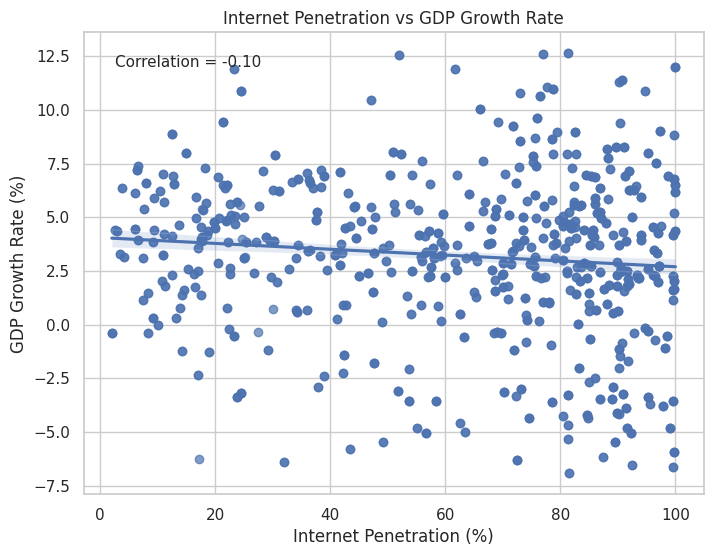

In [ ]:
corr_ip_gdp = df_no_outliers["Internet_Penetration_%"].corr(
    df_no_outliers["GDP_Growth_%"]
)

plt.figure()
sns.regplot(
    x="Internet_Penetration_%",
    y="GDP_Growth_%",
    data=df_no_outliers,
    scatter_kws={"alpha": 0.7}
)

plt.xlabel("Internet Penetration (%)")
plt.ylabel("GDP Growth Rate (%)")
plt.title("Internet Penetration vs GDP Growth Rate")

plt.text(
    0.05, 0.95,
    f"Correlation = {corr_ip_gdp:.2f}",
    transform=plt.gca().transAxes,
    fontsize=11,
    verticalalignment="top"
)

plt.show()




This scatter plot examines the relationship between internet penetration and GDP growth. The trend line shows a very weak negative correlation (r = -0.10), indicating that higher internet penetration does **not show a meaningful linear association** with GDP growth in this dataset. This suggests that other factors may play a stronger role in determining economic growth.

## Q2 — Inflation vs Unemployment (Developing Economies note)

### Variables
- **X:** `Inflation_Rate_%`  
- **Y:** `Unemployment_Rate_%`  

### Hypothesis Test (Pearson Correlation)
- **H₀:** No linear association between X and Y (ρ = 0)
- **H₁:** A linear association exists between X and Y (ρ ≠ 0)

We use **Pearson correlation** to measure direction/strength (*r*) and a **p-value** to test significance at **α = 0.05**.


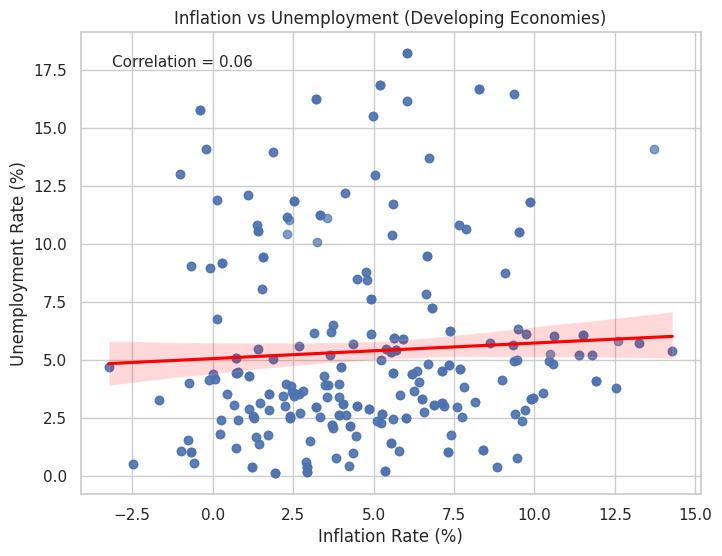

In [ ]:
# Developing economies proxy (HDI < 0.7) after outlier removal
developing_df = df_no_outliers[df_no_outliers["hdi"] < 0.7]

corr_inf_unemp = developing_df["Inflation_Rate_%"].corr(
    developing_df["Unemployment_Rate_%"]
)

plt.figure()
sns.regplot(
    x="Inflation_Rate_%",
    y="Unemployment_Rate_%",
    data=developing_df,
    scatter_kws={"alpha": 0.7},
    line_kws={"color": "red"}
)

plt.xlabel("Inflation Rate (%)")
plt.ylabel("Unemployment Rate (%)")
plt.title("Inflation vs Unemployment (Developing Economies)")

plt.text(
    0.05, 0.95,
    f"Correlation = {corr_inf_unemp:.2f}",
    transform=plt.gca().transAxes,
    fontsize=11,
    verticalalignment="top"
)

plt.show()


This plot focuses on developing economies only. The relationship between inflation and unemployment appears very weak (r = 0.06) and scattered, indicating that higher inflation does not consistently correspond to changes in unemployment. This suggests that the classical Phillips Curve relationship is not clearly observed in these countries.

## Q3 — Minimum Wage vs HDI

### Variables
- **X:** `Minimum_Wage_Value`  
- **Y:** `hdi`  

### Hypothesis Test (Pearson Correlation)
- **H₀:** No linear association between X and Y (ρ = 0)
- **H₁:** A linear association exists between X and Y (ρ ≠ 0)

We use **Pearson correlation** to measure direction/strength (*r*) and a **p-value** to test significance at **α = 0.05**.


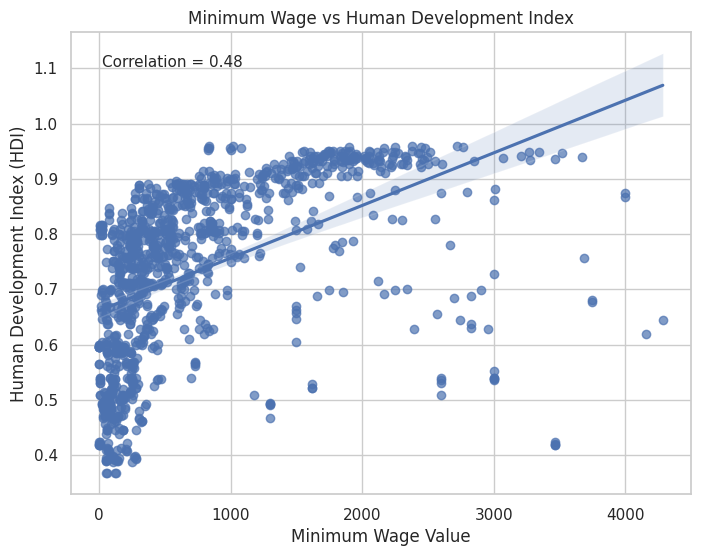

In [ ]:
corr_wage_hdi = df_no_outliers["Minimum_Wage_Value"].corr(
    df_no_outliers["hdi"]
)

plt.figure()
sns.regplot(
    x="Minimum_Wage_Value",
    y="hdi",
    data=df_no_outliers,
    scatter_kws={"alpha": 0.7}
)

plt.xlabel("Minimum Wage Value")
plt.ylabel("Human Development Index (HDI)")
plt.title("Minimum Wage vs Human Development Index")

plt.text(
    0.05, 0.95,
    f"Correlation = {corr_wage_hdi:.2f}",
    transform=plt.gca().transAxes,
    fontsize=11,
    verticalalignment="top"
)

plt.show()



This visualization shows a moderate positive relationship between minimum wage levels and HDI (r = 0.48). Countries with higher minimum wages tend to have better outcomes in education, income, and life expectancy, suggesting that higher wages are associated with improved overall well-being

In [ ]:
def simple_regression(x, y):
    # Fit line using numpy (least squares)
    b1, b0 = np.polyfit(x, y, 1)  # slope, intercept
    y_hat = b1*x + b0
    ss_res = np.sum((y - y_hat)**2)
    ss_tot = np.sum((y - np.mean(y))**2)
    r2 = 1 - ss_res/ss_tot if ss_tot != 0 else np.nan
    return b0, b1, r2


pairs = [
    ("Q1", "Internet_Penetration_%", "GDP_Growth_%"),
    ("Q2", "Inflation_Rate_%", "Unemployment_Rate_%"),
    ("Q3", "Minimum_Wage_Value", "hdi"),
]

for label, xcol, ycol in pairs:
    x = df_no_outliers[xcol].to_numpy()
    y = df_no_outliers[ycol].to_numpy()
    b0, b1, r2 = simple_regression(x, y)
    print(f"{label}: {ycol} = {b0:.4f} + ({b1:.4f})*{xcol} | R^2 = {r2:.4f}")


Q1: GDP_Growth_% = 4.0537 + (-0.0136)*Internet_Penetration_% | R^2 = 0.0105
Q2: Unemployment_Rate_% = 6.3519 + (-0.0141)*Inflation_Rate_% | R^2 = 0.0002
Q3: hdi = 0.6615 + (0.0001)*Minimum_Wage_Value | R^2 = 0.2329


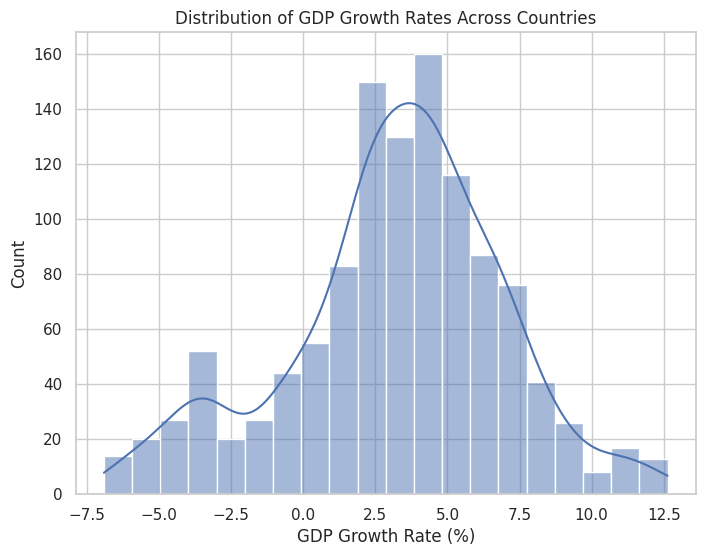

In [ ]:
plt.figure()
sns.histplot(df_no_outliers["GDP_Growth_%"], bins=20, kde=True)

plt.xlabel("GDP Growth Rate (%)")
plt.title("Distribution of GDP Growth Rates Across Countries")
plt.show()



The distribution shows that most countries experience moderate GDP growth, primarily clustered between 0% and 7.5%, while a small number of countries exhibit extreme values or negative growth rates. Understanding this distribution is important because it confirms that the data is now more balanced, ensuring that outliers do not disproportionately influence correlations and trend analysis.

In [ ]:
df_no_outliers["HDI_Group"] = pd.cut(
    df_no_outliers["hdi"],
    bins=[0, 0.55, 0.7, 1.0],
    labels=["Low HDI", "Medium HDI", "High HDI"]
)



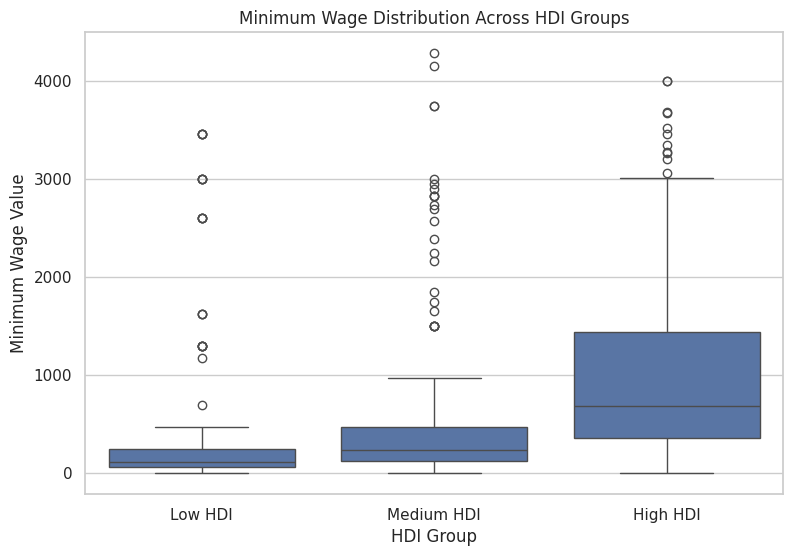

In [ ]:
plt.figure(figsize=(9,6))
sns.boxplot(
    x="HDI_Group",
    y="Minimum_Wage_Value",
    data=df_no_outliers
)

plt.xlabel("HDI Group")
plt.ylabel("Minimum Wage Value")
plt.title("Minimum Wage Distribution Across HDI Groups")
plt.show()



This boxplot compares minimum wage levels across HDI groups.
Countries with higher HDI levels consistently show higher median minimum wages, reinforcing the positive association between income policies and human development.

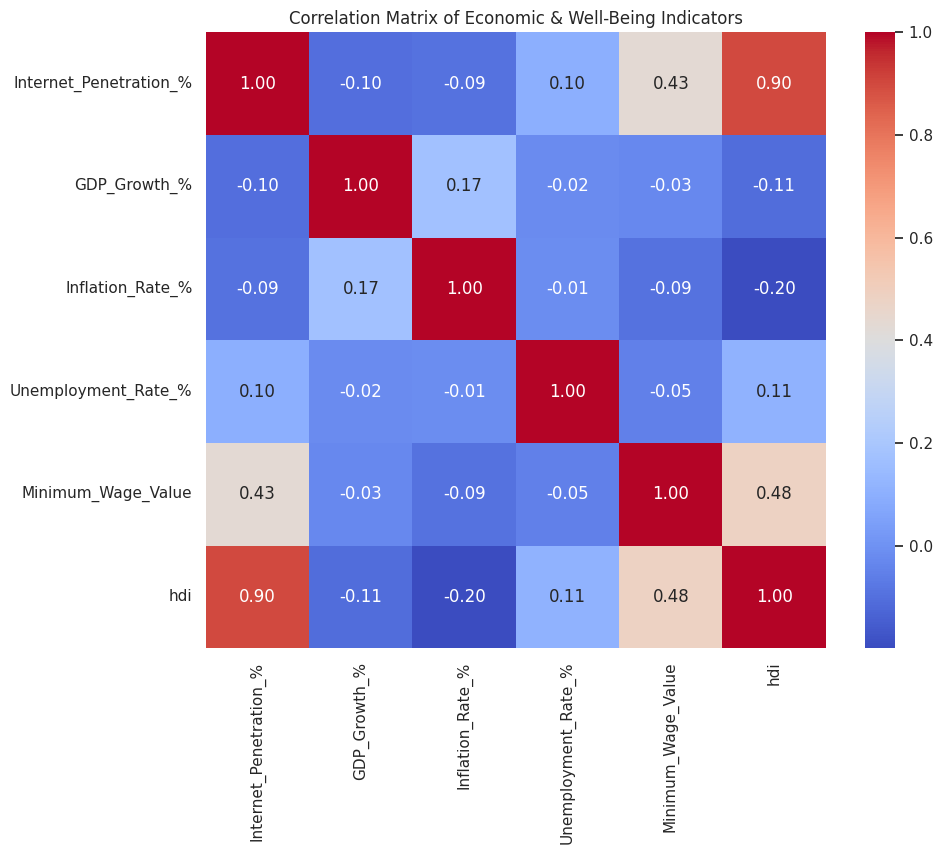

In [ ]:
plt.figure(figsize=(10, 8))

corr = df_no_outliers[[
    "Internet_Penetration_%",
    "GDP_Growth_%",
    "Inflation_Rate_%",
    "Unemployment_Rate_%",
    "Minimum_Wage_Value",
    "hdi"
]].corr()

sns.heatmap(
    corr,
    annot=True,
    cmap="coolwarm",
    fmt=".2f"
)

plt.title("Correlation Matrix of Economic & Well-Being Indicators")
plt.show()



Overall Findings: The exploratory analysis reveals that internet penetration and minimum wage levels are strongly and positively associated with HDI (0.90 and 0.48 respectively). In contrast, inflation and unemployment show a negligible relationship (-0.01), suggesting that traditional economic trade-offs do not strongly hold in this context. Together, the visuals provide strong empirical support for the role of digital access and income policies in enhancing human well-being rather than just immediate GDP growth.